<a href="https://colab.research.google.com/github/AkashK18/Hotel_Booking_Analysis_Capstone_Project/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#Import package
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hotel_df = pd.read_csv('/content/drive/MyDrive/EDA_capstone/Copy of Hotel Bookings.csv')
hotel_df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# there are 119390 records in the dataset.

In [ ]:
# checking columns present in the dataset

hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## **INSPECTING NULL VALUES:** ##

#### We see that our dataset has 31 variables in total.

#### Variables that have null values present are:
  * #### company
  * #### agent
  * #### children
  * #### country

### **1. 'company' variable:** ###

In [ ]:
#checking unique values of 'company' column, because it seems that this must be some sort of categorical column:

print(hotel_df['company'].unique())
print('Company unique values: ',len(hotel_df['company'].unique()))

[ nan 110. 113. 270. 178. 240. 154. 144. 307. 268.  59. 204. 312. 318.
  94. 174. 274. 195. 223. 317. 281. 118.  53. 286.  12.  47. 324. 342.
 373. 371. 383.  86.  82. 218.  88.  31. 397. 392. 405. 331. 367.  20.
  83. 416.  51. 395. 102.  34.  84. 360. 394. 457. 382. 461. 478. 386.
 112. 486. 421.   9. 308. 135. 224. 504. 269. 356. 498. 390. 513. 203.
 263. 477. 521. 169. 515. 445. 337. 251. 428. 292. 388. 130. 250. 355.
 254. 543. 531. 528.  62. 120.  42.  81. 116. 530. 103.  39.  16.  92.
  61. 501. 165. 291. 290.  43. 325. 192. 108. 200. 465. 287. 297. 490.
 482. 207. 282. 437. 225. 329. 272.  28.  77. 338.  72. 246. 319. 146.
 159. 380. 323. 511. 407. 278.  80. 403. 399.  14. 137. 343. 346. 347.
 349. 289. 351. 353.  54.  99. 358. 361. 362. 366. 372. 365. 277. 109.
 377. 379.  22. 378. 330. 364. 401. 232. 255. 384. 167. 212. 514. 391.
 400. 376. 402. 396. 302. 398.   6. 370. 369. 409. 168. 104. 408. 413.
 148.  10. 333. 419. 415. 424. 425. 423. 422. 435. 439. 442. 448. 443.
 454. 

#### 'company' variable has 6797 non null records filled with 353 unique values, which means that these are unique company ids and the ones with 'NaN' values mean that no company was involved in that booking. 
#### It would make sense to fill it with -1 or 0 since it is a categorical feature, not numerical.

### **2. '*agent*' variable:** ###

In [ ]:
#agent

print('Unique agent values: ',hotel_df['agent'].unique())
print('-----------------------------------------------------')
print('Total unique agent values: ',len(hotel_df['agent'].unique()))

Unique agent values:  [ nan 304. 240. 303.  15. 241.   8. 250. 115.   5. 175. 134. 156. 243.
 242.   3. 105.  40. 147. 306. 184.  96.   2. 127.  95. 146.   9. 177.
   6. 143. 244. 149. 167. 300. 171. 305.  67. 196. 152. 142. 261. 104.
  36.  26.  29. 258. 110.  71. 181.  88. 251. 275.  69. 248. 208. 256.
 314. 126. 281. 273. 253. 185. 330. 334. 328. 326. 321. 324. 313.  38.
 155.  68. 335. 308. 332.  94. 348. 310. 339. 375.  66. 327. 387. 298.
  91. 245. 385. 257. 393. 168. 405. 249. 315.  75. 128. 307.  11. 436.
   1. 201. 183. 223. 368. 336. 291. 464. 411. 481.  10. 154. 468. 410.
 390. 440. 495. 492. 493. 434.  57. 531. 420. 483. 526. 472. 429.  16.
 446.  34.  78. 139. 252. 270.  47. 114. 301. 193. 182. 135. 350. 195.
 352. 355. 159. 363. 384. 360. 331. 367.  64. 406. 163. 414. 333. 427.
 431. 430. 426. 438. 433. 418. 441. 282. 432.  72. 450. 180. 454. 455.
  59. 451. 254. 358. 469. 165. 467. 510. 337. 476. 502. 527. 479. 508.
 535. 302. 497. 187.  13.   7.  27.  14.  22.  17.  28.

#### 'agent' variable has 103050 non null records filled with 334 unique values, which means that these are unique agent ids and the ones with 'NaN' values mean that no agent was involved in that booking. 
####It would make sense to fill it with -1 or 0 since it is a categorical feature, not numerical.

### **3. '*children*' variable:** ###

In [ ]:
hotel_df[hotel_df['children'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


### These records have children as NaN and these are also cancelled bookings so these values would be replaced by 0.

### **4. '*country*' variable:** ###

In [ ]:
print('List of Countries: ', hotel_df['country'].unique())
print('-----------------------------------------------------')
print('Total no of countries: ',len(hotel_df['country'].unique()))

List of Countries:  ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY'
 'MLI' 'NAM' 'BOL' 'PRY' 'BRB' 'AB

In [ ]:
# records with 'country' as NaN
hotel_df[hotel_df['country'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,0.0,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65909,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65910,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,0.0,0,BB,NaN,Groups,TA/TO,0,0,0,A,A,0,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


#### There are 488 records that do not have country mentioned, so this will be replaced by 'Unknown'.

### **Replacing Null values:** ###

In [ ]:
# REPLACING NaN VALUES OF 4 VARIABLES:

hotel_df.company.fillna(0, inplace=True)               #company
hotel_df.agent.fillna(0, inplace=True)                 #agent
hotel_df.children.fillna(0, inplace=True)              #children
hotel_df.country.fillna('Unknown', inplace=True)       #country

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **EXPLORATORY DATA ANALYSIS:** #

#### Before doing basic analysis, some feature extraction needs to be done first regarding Dates, duration of customer staying (week+weekend) and total kids (children+babies)

In [ ]:
#feature extraction

from datetime import datetime
hotel_df['arrival_date'] = hotel_df['arrival_date_day_of_month'].astype(str) +'-' +hotel_df['arrival_date_month'].astype(str) +'-' +hotel_df['arrival_date_year'].astype(str) #combining indivdual date elements together
hotel_df['arrival_date'] = pd.to_datetime(hotel_df['arrival_date']) #convreting to datetime.
hotel_df['arrival_month_year'] = hotel_df['arrival_date'].dt.to_period('M') #extracting year-month

hotel_df['total_nights'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights'] 
hotel_df['kids'] = hotel_df['children'] + hotel_df['babies']
hotel_df['total_persons'] = hotel_df['kids'] + hotel_df['adults']

In [ ]:
# #DURATION OF INTEREST:

print('The time duration (year-month) of our dataset is from: ' ,hotel_df['arrival_month_year'].min(),' to ',hotel_df['arrival_month_year'].max()) 

The time duration (year-month) of our dataset is from:  2015-07  to  2017-08


In [ ]:
# UNIQUE HOTEL NAMES:

print('The Hotels of interest in our dataset are: ',hotel_df['hotel'].unique())

The Hotels of interest in our dataset are:  ['Resort Hotel' 'City Hotel']


In [ ]:
# CONFIRMED AND CANCELLED BOOKINGS IN OUR DATASET

print('Confirmed Bookings: ', hotel_df[hotel_df['is_canceled'] == 0].shape[0])
print('Cancelled Booking: ',  hotel_df[hotel_df['is_canceled'] == 1].shape[0])

Confirmed Bookings:  75166
Cancelled Booking:  44224


In [ ]:
# CREATING SEPERATE DATASETS FOR CONFIRMED AND CANCELED BOOKINGS:

hotel_confirmed_df = hotel_df[hotel_df['is_canceled'] == 0].copy()  #confirmed bookings
hotel_canceled_df = hotel_df[hotel_df['is_canceled'] == 1].copy()   #cancelled bookings

# **WHERE ARE THE CUSTOMERS COMING FROM?** #

In [ ]:
# top 20 overall country wise CONFIRMED bookings:

top_20_confirmed_df = hotel_confirmed_df.groupby('country').size().sort_values(ascending=False).reset_index().rename(columns={0:'Confirmed Bookings'}).head(20)
top_20_confirmed_df

,country,Confirmed Bookings
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
5,IRL,2543
6,ITA,2433
7,BEL,1868
8,NLD,1717
9,USA,1596


In [ ]:
# top 20 overall country wise CANCELED bookings

hotel_canceled_df.groupby('country').size().sort_values(ascending=False).reset_index().rename(columns={0:'Canceled Bookings'}).head(20)

,country,Canceled Bookings
0,PRT,27519
1,GBR,2453
2,ESP,2177
3,FRA,1934
4,ITA,1333
5,DEU,1218
6,IRL,832
7,BRA,830
8,USA,501
9,BEL,474


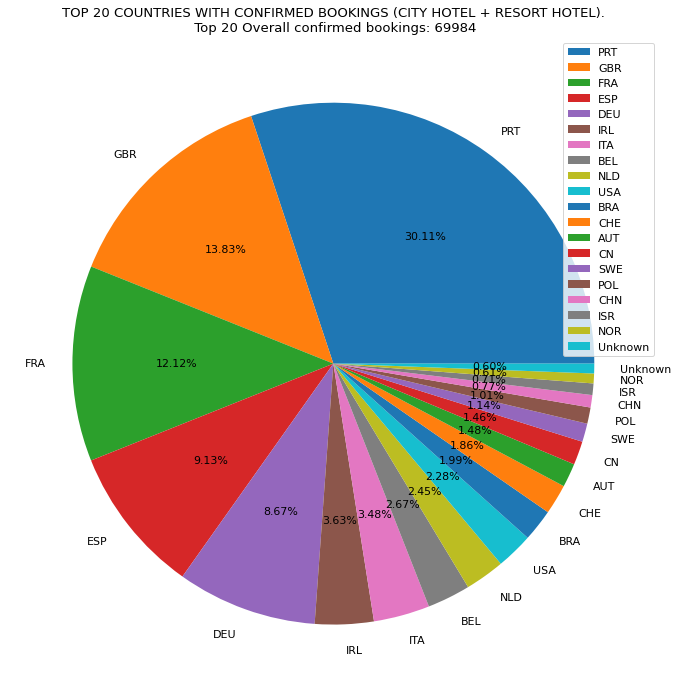

In [ ]:
# PLOTTING TOP 20 COUNTRIES WITH HIGHEST CONFIRMED BOOKINGS ON PIE CHART.

plt.figure(figsize = (25,12))
mpl.rcParams['font.size'] = 11
plt.pie(top_20_confirmed_df['Confirmed Bookings'], labels = top_20_confirmed_df['country'],autopct='%1.2f%%')
plt.legend()
title='TOP 20 COUNTRIES WITH CONFIRMED BOOKINGS (CITY HOTEL + RESORT HOTEL).\n Top 20 Overall confirmed bookings: ' + str(top_20_confirmed_df['Confirmed Bookings'].sum())
plt.title(title)
plt.show() 

* #### From the top 20 confirmed booking count (69984) we see that Portugal (PRT) is covering 30.11 % and next to that is Britain (GBR) ~ 14 % which is less than half of PRT, which confirms that 'City Hotel' and 'Resort Hotel' are located in PORTUGAL. ####

In [ ]:
#Hotel wise Portuguese vs Non-Portuguese
print('City Hotel Portuguese CONFIRMED booking COUNT: ',hotel_confirmed_df[(hotel_confirmed_df['hotel']=='City Hotel') & (hotel_confirmed_df['country']=='PRT') ].shape[0])
print('')
print('Resort Hotel Portuguese CONFIRMED booking COUNT: ',hotel_confirmed_df[(hotel_confirmed_df['hotel']=='Resort Hotel') & (hotel_confirmed_df['country']=='PRT') ].shape[0])
print('-'*60)
print('City Hotel Non-Portuguese CONFIRMED booking COUNT: ',hotel_confirmed_df[(hotel_confirmed_df['hotel']=='City Hotel') & (hotel_confirmed_df['country']!='PRT') ].shape[0])
print('')
print('Resort Hotel Non-Portuguese CONFIRMED booking COUNT: ',hotel_confirmed_df[(hotel_confirmed_df['hotel']=='Resort Hotel') & (hotel_confirmed_df['country']!='PRT') ].shape[0])

City Hotel Portuguese CONFIRMED booking COUNT:  10879

Resort Hotel Portuguese CONFIRMED booking COUNT:  10192
------------------------------------------------------------
City Hotel Non-Portuguese CONFIRMED booking COUNT:  35349

Resort Hotel Non-Portuguese CONFIRMED booking COUNT:  18746


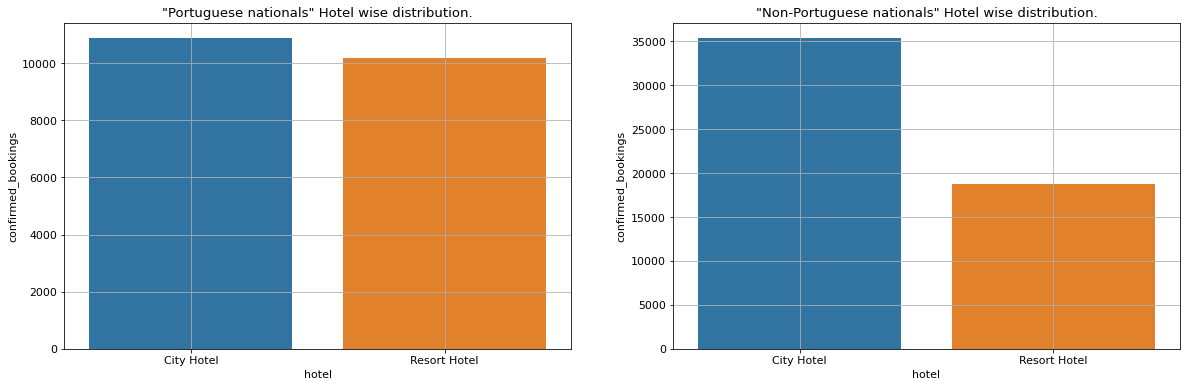

In [ ]:
#visualization of above cell:
portuguese_confirmed_df = hotel_confirmed_df[(hotel_confirmed_df['country']=='PRT')].groupby(['hotel']).agg({'is_canceled':'count'}).reset_index().rename(columns = {'is_canceled':'confirmed_bookings'})

non_portuguese_confirmed_df = hotel_confirmed_df[ (hotel_confirmed_df['country']!='PRT') ].groupby(['hotel']).agg({'is_canceled':'count'}).reset_index().rename(columns = {'is_canceled':'confirmed_bookings'})


fig, axes1 = plt.subplots(1,2, figsize=(20,6))
mpl.rcParams['font.size'] = 11

sns.barplot(x = 'hotel', y = 'confirmed_bookings', data = portuguese_confirmed_df, ax=axes1[0])
axes1[0].set_title('"Portuguese nationals" Hotel wise distribution.')
axes1[0].grid(True)


sns.barplot(x = 'hotel', y = 'confirmed_bookings', data = non_portuguese_confirmed_df, ax=axes1[1])
axes1[1].set_title('"Non-Portuguese nationals" Hotel wise distribution.')
axes1[1].grid(True)

In [ ]:
#Portuguese retention rate city hotel
prt_city_retention = hotel_confirmed_df[(hotel_confirmed_df['country'] == 'PRT') & (hotel_confirmed_df['is_repeated_guest'] == 1) & (hotel_confirmed_df['hotel'] == 'City Hotel')].shape[0]/hotel_confirmed_df[(hotel_confirmed_df['country'] == 'PRT') & (hotel_confirmed_df['hotel'] == 'City Hotel')].shape[0]

print('City Hotel PORTUGUESE nationals RETENTION RATE is: ',round(prt_city_retention*100,2),'%')

#Portuguese retention rate resort hotel
prt_resort_retention = hotel_confirmed_df[(hotel_confirmed_df['country'] == 'PRT') & (hotel_confirmed_df['is_repeated_guest'] == 1) & (hotel_confirmed_df['hotel'] == 'Resort Hotel')].shape[0]/hotel_confirmed_df[(hotel_confirmed_df['country'] == 'PRT') & ((hotel_confirmed_df['hotel'] == 'Resort Hotel'))].shape[0]

print('Resort Hotel PORTUGUESE nationals RETENTION RATE is: ',round(prt_resort_retention*100,2),'%')

print('-'*65)

#Foreign retention rate city hotel
non_prt_city_retention = hotel_confirmed_df[(hotel_confirmed_df['country'] != 'PRT') & (hotel_confirmed_df['is_repeated_guest'] == 1) & (hotel_confirmed_df['hotel'] == 'City Hotel')].shape[0]/hotel_confirmed_df[(hotel_confirmed_df['country'] != 'PRT') & (hotel_confirmed_df['hotel'] == 'City Hotel')].shape[0]

print('City Hotel non-PORTUGUESE nationals RETENTION RATE is: ',round(non_prt_city_retention*100,2),'%')

#Foreign retention rate resort hotel
non_prt_resort_retention = hotel_confirmed_df[(hotel_confirmed_df['country'] != 'PRT') & (hotel_confirmed_df['is_repeated_guest'] == 1) & (hotel_confirmed_df['hotel'] == 'Resort Hotel')].shape[0]/hotel_confirmed_df[(hotel_confirmed_df['country'] != 'PRT') & (hotel_confirmed_df['hotel'] == 'Resort Hotel')].shape[0]

print('Resort Hotel non-PORTUGUESE nationals RETENTION RATE is: ',round(non_prt_resort_retention*100,2),'%')

City Hotel PORTUGUESE nationals RETENTION RATE is:  12.28 %
Resort Hotel PORTUGUESE nationals RETENTION RATE is:  13.62 %
-----------------------------------------------------------------
City Hotel non-PORTUGUESE nationals RETENTION RATE is:  0.72 %
Resort Hotel non-PORTUGUESE nationals RETENTION RATE is:  1.49 %


#### From ' "Portuguese nationals" Hotel wise distribution ' & ' "Non-Portuguese nationals" Hotel wise distribution ' bar plot we observe:

  * #### The preference of Portuguese nationals is similar for both 'City' and 'Resort' hotel as compared to Non-Protuguese, with ~11000 for 'City' and slighly above 10000 for 'Resort'.
  * #### But in the case of Non-Portuguese nationals, 'City Hotel' has catered to almost double the people of what 'Resort Hotel' has.
  * #### Looking at the retention rate in both PRT & non-PRT cases, 'Resort Hotel' has a better retention rate. 
  * #### 'Resort hotel' needs to market itself more among non-PRT customers. 

# **MARKET SEGMENT WISE ‘CONFIRMED’ BOOKINGS & PAYMENT MODE.** #

In [ ]:
hotel_confirmed_df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

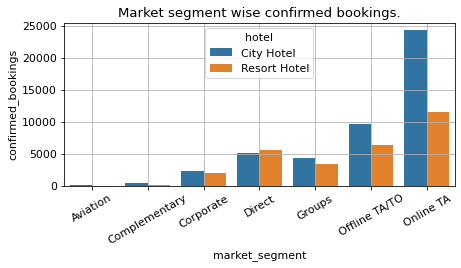

In [ ]:
# market segment wise confirmed bookings

market_segment_confirmed_df = pd.DataFrame(hotel_confirmed_df.groupby(['hotel','market_segment']).agg({'is_canceled':'count'})).reset_index().rename(columns = {'is_canceled':'confirmed_bookings'})


plt.figure(figsize = (7,3))
mpl.rcParams['font.size'] = 11
sns.barplot(x = 'market_segment', y='confirmed_bookings', 
               hue = 'hotel',data=market_segment_confirmed_df).set_xticklabels(market_segment_confirmed_df['market_segment'] ,rotation=30)
plt.title('Market segment wise confirmed bookings.')
plt.grid()

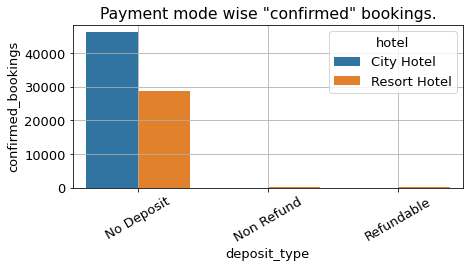

In [ ]:
deposit_type_confirmed_df = pd.DataFrame(hotel_confirmed_df.groupby(['hotel','deposit_type']).agg({'is_canceled':'count'})).reset_index().rename(columns = {'is_canceled':'confirmed_bookings'})

plt.figure(figsize = (7,3))
sns.barplot(x = 'deposit_type', y='confirmed_bookings', 
               hue = 'hotel',data=deposit_type_confirmed_df).set_xticklabels(deposit_type_confirmed_df['deposit_type'],rotation=30)

plt.title('Payment mode wise "confirmed" bookings.')
plt.grid()

* #### The ‘Online Travel Agency(TA)’ market segment is bringing most of the business to hotels. 
* #### ‘Offline TA/TO’, ’Groups’, ‘Direct’ & ‘Corporate’ market segments are also bringing business, but ‘Online TA’ is way ahead, which is normal in the age of internet.
* #### ‘Aviation’ & ‘Complementary’ are on the lower side.


* #### In the terms of payment mode preferred by customers, almost all customers prefer ‘No Deposit’ mode of payment, ie paying at the time of checking out from the hotel.



**DURATION OF STAY & ADR:**

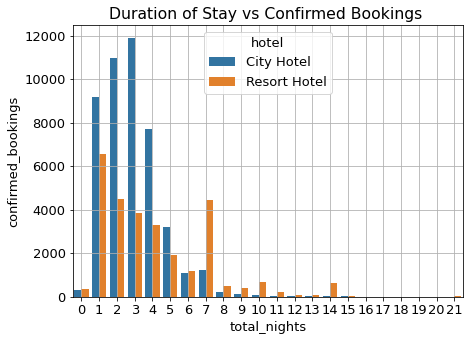

In [ ]:
city_hotel_stay_df = pd.DataFrame(hotel_confirmed_df[hotel_confirmed_df['hotel'] == 'City Hotel'].groupby(['hotel','total_nights']).agg({'is_canceled':'count'})).reset_index().rename(columns = {'is_canceled':'confirmed_bookings'}).sort_values(by='total_nights',ascending=True).head(21)
# 21 days

resort_hotel_stay_df = pd.DataFrame(hotel_confirmed_df[hotel_confirmed_df['hotel'] == 'Resort Hotel'].groupby(['hotel','total_nights']).agg({'is_canceled':'count'})).reset_index().rename(columns = {'is_canceled':'confirmed_bookings'}).sort_values(by='total_nights',ascending=True).head(21)
# 21 days


hotel_stay_df = pd.concat([city_hotel_stay_df,resort_hotel_stay_df]).reset_index().drop(columns='index') #concating DFs


plt.figure(figsize = (7,5))
sns.barplot(x = 'total_nights', y='confirmed_bookings', 
               hue = 'hotel',data=hotel_stay_df) #.set_xticklabels(hotel_stay_df['total_nights'],rotation=30)
plt.title('Duration of Stay vs Confirmed Bookings ')
plt.grid()

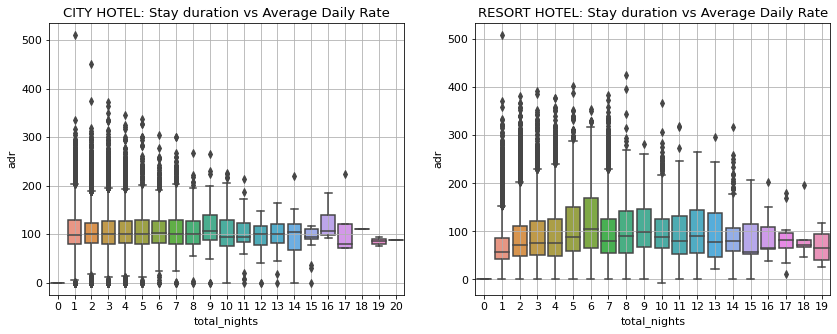

In [ ]:
fig, axes1 = plt.subplots(1,2, figsize=(14,5))
sns.boxplot(x="total_nights", y="adr", data=hotel_confirmed_df[(hotel_confirmed_df['hotel']=='City Hotel') & (hotel_confirmed_df['total_nights'].isin(range(0,21)))],ax=axes1[0])
axes1[0].set_title('CITY HOTEL: Stay duration vs Average Daily Rate')
axes1[0].grid()

sns.boxplot(x="total_nights", y="adr", data=hotel_confirmed_df[(hotel_confirmed_df['hotel']=='Resort Hotel') & (hotel_confirmed_df['total_nights'].isin(range(0,21)))],ax=axes1[1])
axes1[1].set_title('RESORT HOTEL: Stay duration vs Average Daily Rate')
axes1[1].grid()

#### From Duration of stay vs Confirmed Bookings bar plot, we see:
* #### For ‘City Hotel’, customers have mostly preferred to stay upto 3 nights, after that it decreases considerably.

* #### Whereas for ‘Resort Hotel’, seeing the confirmed bookings, customers have preferred to stay for 3-5 nights & there are customers who prefer to stay till 7 nights also. This is an indicator that people coming to ‘Resort Hotel’ are coming for a longer trip.


**ROOM TYPE & ADR:**

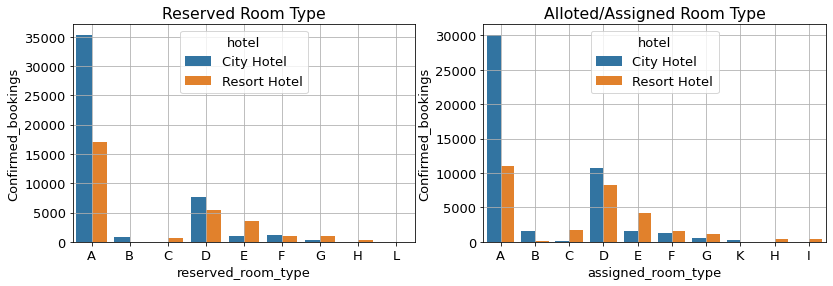

In [ ]:
#RESERVED ROOM TYPE AND ASSIGNED ROOM TYPE:

reserved_room_df = pd.DataFrame(hotel_confirmed_df.groupby(['hotel','reserved_room_type']).agg({'is_canceled':'count'})).reset_index().rename(columns = {'is_canceled':'Confirmed_bookings'})

assigned_room_df = pd.DataFrame(hotel_confirmed_df.groupby(['hotel','assigned_room_type']).agg({'is_canceled':'count'})).reset_index().rename(columns = {'is_canceled':'Confirmed_bookings'})

fig, axes1 = plt.subplots(1,2, figsize=(13.5,4)) #subplot

mpl.rcParams['font.size'] = 13

sns.barplot(x = 'reserved_room_type', y='Confirmed_bookings', 
               hue = 'hotel',data=reserved_room,ax=axes1[0]) 
axes1[0].set_title('Reserved Room Type')
axes1[0].grid()

sns.barplot(x = 'assigned_room_type', y='Confirmed_bookings', 
               hue = 'hotel',data=assigned_room ,ax=axes1[1])
axes1[1].set_title('Alloted/Assigned Room Type')
axes1[1].grid()

* #### From the 'reserved' room type bar plot we can see that there is a very high demand of room type 'A' for both 'City' and 'Resort Hotel', ~35000 and ~17000 respectively.

* #### But not everyone is getting room type 'A' which we can see from 'assigned' room type bar plot where, room type 'A' confirmed bookings are ~30000 for 'City Hotel' and ~12000 for 'Resort Hotel'.

* #### The remaining are alloted some other rooms, and we can see that majority of that are assigned room type 'D', with assigned room 'D' increasing to ~12000 for 'City Hotel' from ~7000 (in reserved room bar plot) and for 'Resort Hotel' bookings for room type 'D' increases slighly to ~8000 from ~5000 (in reserved room bar plot).

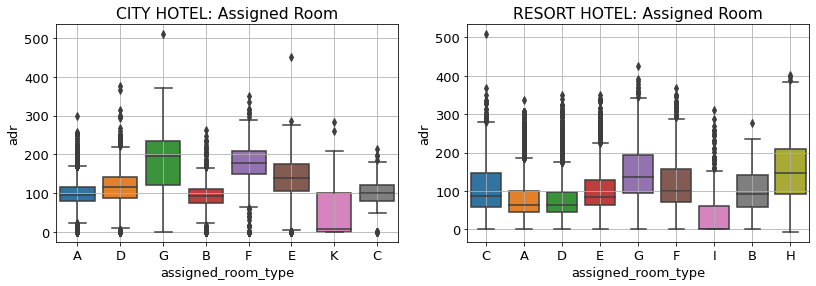

In [ ]:
# ROOM WISE AVERAGE DAILY RATE (ADR) FOR 'CITY' AND 'RESORT' HOTELS:

fig, axes1 = plt.subplots(1,2, figsize=(13.5,4))
sns.boxplot(x="assigned_room_type", y="adr", data=hotel_confirmed_df[hotel_confirmed_df['hotel']=='City Hotel'],ax=axes1[0])
axes1[0].set_title('CITY HOTEL: Assigned Room')
axes1[0].grid()

sns.boxplot(x="assigned_room_type", y="adr", data=hotel_confirmed_df[hotel_confirmed_df['hotel']=='Resort Hotel'],ax=axes1[1])
axes1[1].set_title('RESORT HOTEL: Assigned Room')
axes1[1].grid()

#### Observations from '*assigned_room_type*' vs '*adr*' box-plot:

* #### For '**CITY HOTEL**', from bar plots we saw, rooms 'A' and 'D' are alloted the most. The Median Avergae Daily rate of room 'D' is slightly higher than room type 'A'. 
#### Room type 'G','F','E' have considerably higher median ADR, which is an indicator of those being high end rooms.
* #### For '**RESORT HOTEL**' also, from bar plots we saw, rooms 'A' and 'D' are  alloted the most. The Median Avergae Daily rate of room 'D' is similar to that of room type 'A'. 
#### Room type 'G' & 'H' have considerably higher median ADR, which is an indicator of those being high end rooms. Room types 'C','E','F','B' lie somewhat between ['A','D'] and ['G','H'].

# **CANCELED BOOKINGS:** #

#### Hypothesis: Not getting the desired/reserved room type is a factor for booking cancelations.

#### Visual Inspection:

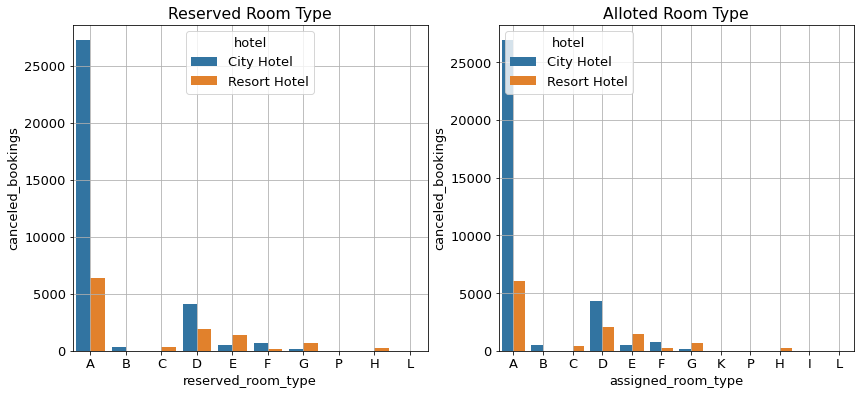

In [ ]:
# reserved and assigned room type for CANCELED bookings

reserved_room_canc_df = pd.DataFrame(hotel_canceled_df.groupby(['hotel','reserved_room_type']).agg({'is_canceled':'count'})).reset_index().rename(columns = {'is_canceled':'canceled_bookings'})

assigned_room_canc_df = pd.DataFrame(hotel_canceled_df.groupby(['hotel','assigned_room_type']).agg({'is_canceled':'count'})).reset_index().rename(columns = {'is_canceled':'canceled_bookings'})

fig, axes1 = plt.subplots(1,2, figsize=(14,6))

sns.barplot(x = 'reserved_room_type', y='canceled_bookings', 
               hue = 'hotel',data=reserved_room_canc_df,ax=axes1[0]) #.set_xticklabels( rotation=30)
axes1[0].set_title('Reserved Room Type')
axes1[0].grid()               

sns.barplot(x = 'assigned_room_type', y='canceled_bookings', 
               hue = 'hotel',data=assigned_room_canc_df ,ax=axes1[1]) #.set_xticklabels(rotation=30)
axes1[1].set_title('Alloted Room Type')
axes1[1].grid()

#### From the above plot for 'reserved' and 'assigned' room type we see that there is almost no change between two plots, hence 'not getting desired room type' does not affect booking cancellations.

#### Now checking 'market segment' wise booking cancellations:

**MARKET SEGMENT' WISE BOOKING CANCELLATIONS:**

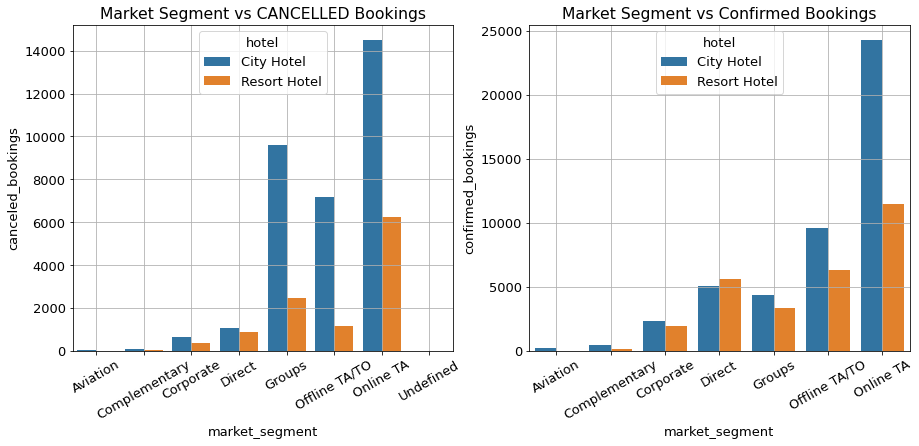

In [ ]:
# market segment wise cancellations

market_segment_canceled_df = pd.DataFrame(hotel_canceled_df.groupby(['hotel','market_segment']).agg({'is_canceled':'count'})).reset_index().rename(columns = {'is_canceled':'canceled_bookings'})

fig, axes = plt.subplots(1,2, figsize=(15,6))
#-------------------------------------------------------------------------------------------------------------------------------------------------
sns.barplot(x = 'market_segment', y='canceled_bookings', 
               hue = 'hotel',data=market_segment_canceled_df,ax=axes[0]).set_xticklabels(market_segment_canceled_df['market_segment'],rotation=30)
axes[0].set_title('Market Segment vs CANCELLED Bookings')
axes[0].grid()
#--------------------------------------------------------------------------------------------------------------------------------------------------

# market segment wise confirmed bookings
sns.barplot(x = 'market_segment', y='confirmed_bookings', 
               hue = 'hotel',data=market_segment_confirmed_df,ax=axes[1]).set_xticklabels(market_segment_confirmed_df['market_segment'] ,rotation=30)
axes[1].set_title('Market Segment vs Confirmed Bookings')
axes[1].grid()

#### From above confirmed bookings barplot we see that 'Online' & 'Offline TA/TO' market segment brings maximum customers so it is understandable that more 'cancelled' bookings will also be from these segments, but less than booked ones.

#### On a total contrast, in the 'Group' market segment, for 'City Hotel', we see that more people have cancelled their bookings (~ 10000) than 'confirmed' (~ 4000), which is surprising.

**PAYMENT MODE WISE CANCELLED BOOKINGS:**

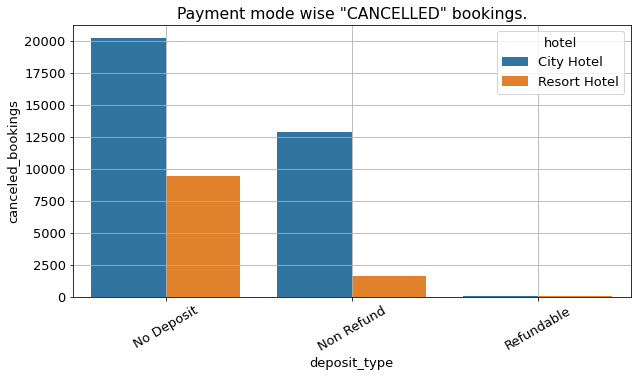

In [ ]:
deposit_type_canceled_df = pd.DataFrame(hotel_canceled_df.groupby(['hotel','deposit_type']).agg({'is_canceled':'count'})).reset_index().rename(columns = {'is_canceled':'canceled_bookings'})

plt.figure(figsize = (10,5))
sns.barplot(x = 'deposit_type', y='canceled_bookings', 
               hue = 'hotel',data=deposit_type_canceled_df).set_xticklabels(deposit_type_canceled_df['deposit_type'],rotation=30)
plt.title('Payment mode wise "CANCELLED" bookings.')
plt.grid()


#### In the ‘Payment mode’ wise ‘cancelled’ bookings we see that,
* #### For ‘City Hotel’, there are ~20000 cancelled bookings in ‘No Deposit’, which makes sense because customer isn’t losing money even if they cancel the booking, but surprisingly there are ~12500 customers who had paid under ‘Non refund’ mode and then cancelled the booking which is surprising, because customer is losing a lot of money!
* #### For ‘Resort Hotel’, there are ~9000 ‘cancelled’ bookings in ‘No Deposit’ and ~1500 cancelled bookings in ‘Non Refund’, which is not as high as ‘City Hotel’.


**MARKET SEGMENT WISE "NON-REFUND" & "NO DEPOSIT" CANCELLED BOOKINGS:**

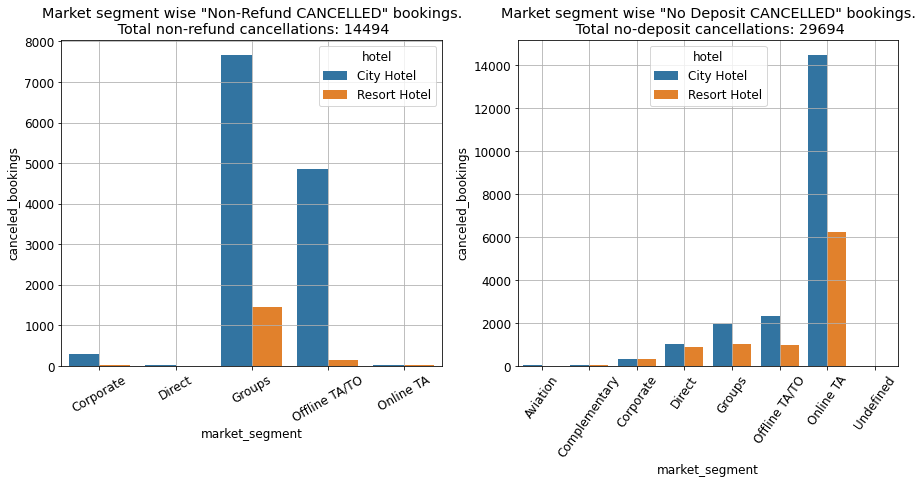

<Figure size 504x360 with 0 Axes>

In [ ]:
canceled_non_refund_df = hotel_canceled_df[hotel_canceled_df['deposit_type'] == 'Non Refund'].groupby(['hotel','market_segment']).agg({'is_canceled':'count'}).reset_index().rename(columns = {'is_canceled':'canceled_bookings'})

# plt.figure(figsize = (7,5))

fig, axes = plt.subplots(1,2, figsize=(15,6))

sns.barplot(x = 'market_segment', y='canceled_bookings', 
               hue = 'hotel',data=canceled_non_refund_df,ax = axes[0]).set_xticklabels(canceled_non_refund_df['market_segment'],rotation=30)

non_refund_canceled_booking = hotel_canceled_df[hotel_canceled_df['deposit_type'] == 'Non Refund'].shape[0]

axes[0].set_title('Market segment wise "Non-Refund CANCELLED" bookings.\n Total non-refund cancellations: '+ str(non_refund_canceled_booking))
axes[0].grid()


#-----------------------------------------------------------------------------------------------------------------------#
canceled_no_deposit_df = hotel_canceled_df[hotel_canceled_df['deposit_type'] == 'No Deposit'].groupby(['hotel','market_segment']).agg({'is_canceled':'count'}).reset_index().rename(columns = {'is_canceled':'canceled_bookings'})

plt.figure(figsize = (7,5))
sns.barplot(x = 'market_segment', y='canceled_bookings', 
               hue = 'hotel',data=canceled_no_deposit_df,ax = axes[1]).set_xticklabels(canceled_no_deposit_df['market_segment'],rotation=55)
               
no_deposit_canceled_booking = hotel_canceled_df[hotel_canceled_df['deposit_type'] == 'No Deposit'].shape[0]

axes[1].set_title('Market segment wise "No Deposit CANCELLED" bookings.\n Total no-deposit cancellations: '+ str(no_deposit_canceled_booking))
axes[1].grid()


* #### Earlier we saw lots of cancellations in ‘Group’ market segment and now in ‘Non refund’ payment mode. Is there a relation? Yes!

* #### In the ‘NON REFUND’ cancellations (bottom left bar plot) , it is observed that, for ‘City’ Hotel, majority of the cancellation are happening from ‘Groups’ and as it turn out, the ‘Offline TA/TO’ market segment also, but for ‘Resort’ hotel it is majorly from ‘Groups’.

* #### So it is now also clear that ‘NO DEPOSIT’ cancellations are majorly  from ‘Online TA’ market segment for both hotels (bottom right bar plot).

**MARKET SEGMENT vs MEDIAN LEAD TIME FOR "CONFIRMED" & "CANCELLED" BOOKINGS:**

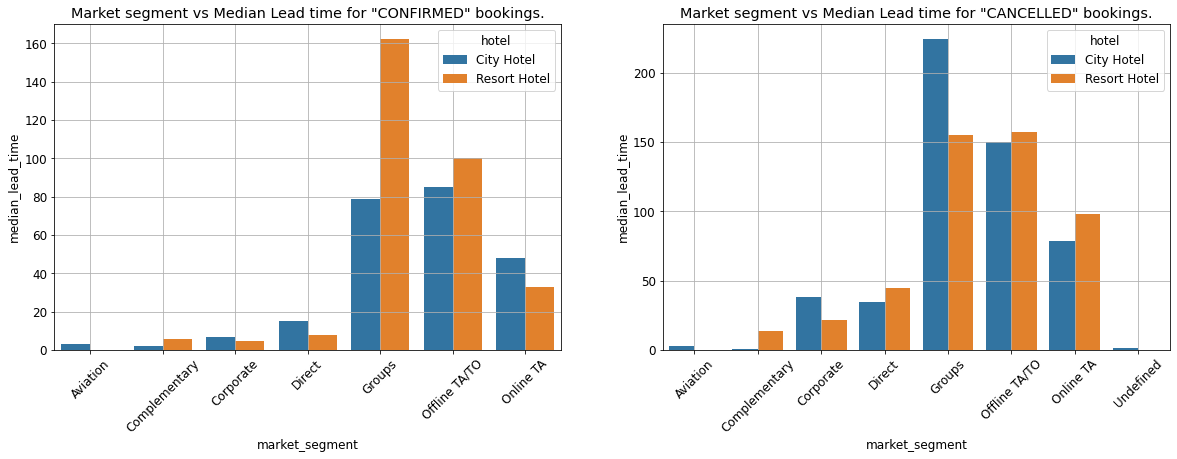

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20,6))

# hotel confirmed lead time:
hotel_confirmed_lead_time_df = hotel_confirmed_df.groupby(['hotel','market_segment']).agg({'lead_time':'median','is_canceled':'count'}).rename(columns={'count':'confirmed_bookings','lead_time':'median_lead_time'}).reset_index()

sns.barplot(x='market_segment',y = 'median_lead_time',hue='hotel',data = hotel_confirmed_lead_time_df,ax = axes[0]).set_xticklabels(hotel_confirmed_lead_time_df['market_segment'],rotation=45)
axes[0].set_title('Market segment vs Median Lead time for "CONFIRMED" bookings.')
axes[0].grid()

# hotel cancelled lead time:
hotel_cancelled_lead_time_df = hotel_canceled_df.groupby(['hotel','market_segment']).agg({'lead_time':'median','is_canceled':'count'}).rename(columns={'count':'cancelled_bookings'}).rename(columns={'count':'confirmed_bookings','lead_time':'median_lead_time'}).reset_index()

sns.barplot(x='market_segment',y = 'median_lead_time',hue='hotel',data = hotel_cancelled_lead_time_df,ax= axes[1]).set_xticklabels(hotel_cancelled_lead_time_df['market_segment'],rotation=45)
axes[1].set_title('Market segment vs Median Lead time for "CANCELLED" bookings.')
axes[1].grid()

In [ ]:
# hotel confirmed lead time dataframe:
hotel_confirmed_lead_time_df

,hotel,market_segment,median_lead_time,is_canceled
0,City Hotel,Aviation,3.0,185
1,City Hotel,Complementary,2.0,478
2,City Hotel,Corporate,7.0,2345
3,City Hotel,Direct,15.0,5037
4,City Hotel,Groups,79.0,4352
5,City Hotel,Offline TA/TO,85.0,9574
6,City Hotel,Online TA,48.0,24257
7,Resort Hotel,Complementary,6.0,168
8,Resort Hotel,Corporate,5.0,1958
9,Resort Hotel,Direct,8.0,5635


In [ ]:
# hotel cancelled lead time dataframe:
hotel_cancelled_lead_time_df

,hotel,market_segment,median_lead_time,is_canceled
0,City Hotel,Aviation,3.0,52
1,City Hotel,Complementary,1.0,64
2,City Hotel,Corporate,38.0,641
3,City Hotel,Direct,35.0,1056
4,City Hotel,Groups,224.0,9623
5,City Hotel,Offline TA/TO,150.0,7173
6,City Hotel,Online TA,79.0,14491
7,City Hotel,Undefined,1.5,2
8,Resort Hotel,Complementary,14.0,33
9,Resort Hotel,Corporate,22.0,351


* #### Visually we can see that, generally for each market segment, the “cancelled” median Lead Time is higher than “confirmed”.
* #### If we see for Online TA market segment (from where most  No Deposit cancellations are coming), in “confirmed” bookings, the median Lead Time for ‘City Hotel’ is ~50 days (under 2 months) & for ‘Resort Hotel’ it is ~30 days (1 month). 
* #### In “cancelled” bookings, the median Lead Time for ‘City hotel’ is ~80 days (> 2 months) & for ‘Resort Hotel’ is ~100 days (> 3 months).


# **'YEAR-MONTH' WISE "DEMAND(CONFIRMED BOOKINGS)" and 'YEAR-MONTH' WISE "MEDIAN ADR":** #

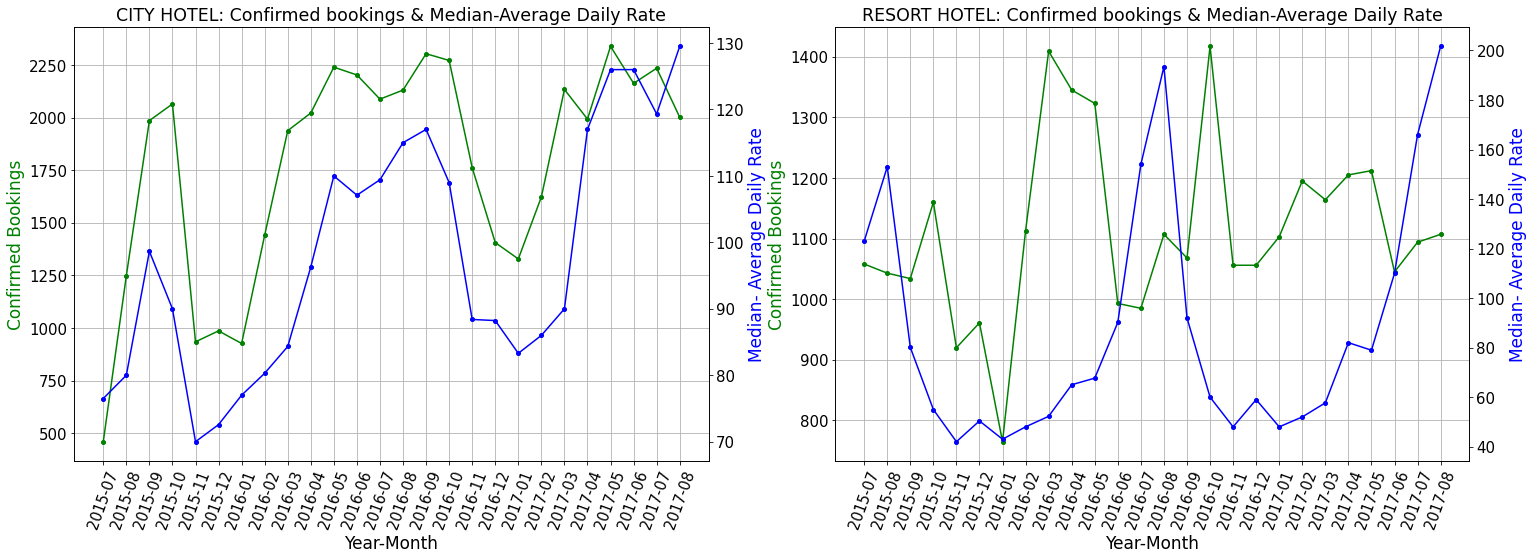

In [ ]:
# WHICH HOTEL IS GETTING MORE CUSTOMERS DURING WHICH PERIOD OF YEAR

pd.set_option('display.max_rows', 100)
city_hotel_df = hotel_confirmed_df[ (hotel_confirmed_df['hotel'] == 'City Hotel')].groupby(by = ['hotel','arrival_month_year']).agg({'assigned_room_type':'count','adr':'median','total_nights':'sum'}).reset_index().rename(columns={'assigned_room_type':'total_non_canceled_customers','adr':'adr_median'})
city_hotel_df['arrival_month_year'] = city_hotel_df['arrival_month_year'].astype(str)

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

resort_hotel_df = hotel_confirmed_df[ (hotel_confirmed_df['hotel'] == 'Resort Hotel')].groupby(by = ['hotel','arrival_month_year']).agg({'assigned_room_type':'count','adr':'median','total_nights':'median','adults':'median','kids':'median'}).reset_index().rename(columns={'assigned_room_type':'total_non_canceled_customers','adr':'adr_median'})
resort_hotel_df['arrival_month_year'] = resort_hotel_df['arrival_month_year'].astype(str)


#---------------------------------------------------

fig, ax = plt.subplots(1,2,figsize = (25,8))

#--------------------------------------------------------------------------------------------------------------#
ax_city = ax[0].twinx() #for two y axes in one plot.
ax[0].plot(city_hotel_df.arrival_month_year,city_hotel_df.total_non_canceled_customers,'g-o',markersize=4)
ax_city.plot(city_hotel_df.arrival_month_year,city_hotel_df.adr_median,'b-o',markersize=4)

mpl.rcParams['font.size'] = 14.5
ax[0].set_title('CITY HOTEL: Confirmed bookings & Median-Average Daily Rate')

ax[0].set_xlabel('Year-Month',fontsize = 17)

ax[0].set_xticklabels(city_hotel_df.arrival_month_year,rotation = 70)
ax[0].tick_params(axis="y", labelsize=15)
ax_city.tick_params(axis="y", labelsize=15)

ax[0].set_ylabel('Confirmed Bookings',fontsize = 17,color='g')
ax_city.set_ylabel('Median- Average Daily Rate',fontsize = 17,color='b')
ax[0].grid(True, which='both')

#--------------------------------------------------------------------------------------------------------------#

ax_resort = ax[1].twinx() #for two y axes in one plot.
ax[1].plot(resort_hotel_df.arrival_month_year,resort_hotel_df.total_non_canceled_customers,'g-o',markersize=4)
ax_resort.plot(resort_hotel_df.arrival_month_year,resort_hotel_df.adr_median,'b-o',markersize=4)

ax[1].set_title('RESORT HOTEL: Confirmed bookings & Median-Average Daily Rate')

ax[1].set_xlabel('Year-Month',fontsize = 17)

ax[1].set_xticklabels(resort_hotel_df.arrival_month_year,rotation = 70)
ax[1].tick_params(axis="y", labelsize=15)
ax_resort.tick_params(axis="y", labelsize=15)

ax[1].set_ylabel('Confirmed Bookings',fontsize = 17,color='g')
ax_resort.set_ylabel('Median- Average Daily Rate',fontsize = 17,color='b')

ax[1].grid(True, which='both')



#### For ‘City Hotel’ we observe that:
* #### The peak season is from the month of March to October and no of customers decrease during winter season, ie from November to January. Then again it starts going up starting from February (Customers/demand is in green in the line plot)
* #### The trend of ADR (in blue) over months is similar to that of the demand, ie as the no of customers starts increasing, the ADR also starts increasing and vice versa (PS- demand and ADR are on different scale). 
* #### From a customer perspective, trip during winter season would be cheaper.


#### For ‘Resort Hotel’ we observe that:
* #### The peak season is from the month of February to May & there is a peak in October. No of customers decrease during June to September & November to January. 
* #### The trend of ADR (in blue) over months is opposite to that of the demand, ie as the no of customers starts increasing, the ADR starts decreasing and vice versa.
* #### From a customer perspective, trip during the peak season of the hotel would be economical.


# **'YEAR-MONTH' WISE SPECIAL REQUESTS:** #

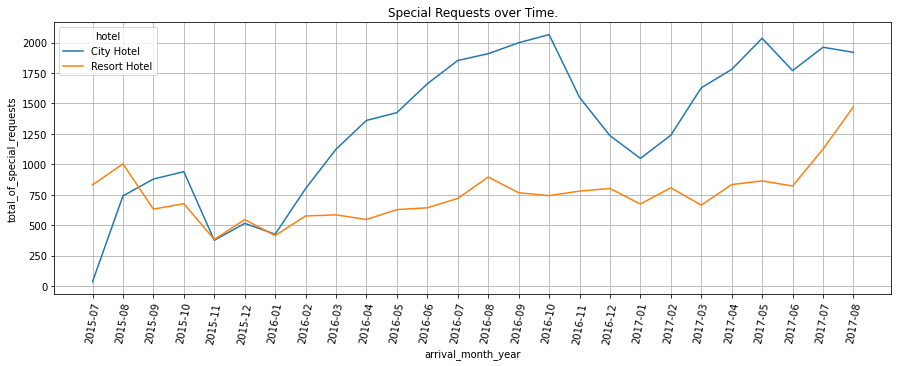

In [ ]:
hotel_special_request_month_year_df = pd.DataFrame(hotel_confirmed_df.groupby(['hotel','arrival_month_year']).agg({'total_of_special_requests':'sum'})).reset_index() #.rename(columns = {'is_canceled':'confirmed_bookings'}).sort_values(by='total_nights',ascending=True).head(14)
hotel_special_request_month_year_df['arrival_month_year'] = hotel_special_request_month_year_df['arrival_month_year'].astype(str)


plt.figure(figsize = (15,5))
sns.lineplot(x='arrival_month_year',y = 'total_of_special_requests',data = hotel_special_request_month_year_df, hue='hotel').set_xticklabels(hotel_special_request_month_year_df['arrival_month_year'],rotation=80)
plt.title('Special Requests over Time.')
plt.grid(True)

* #### For ‘City Hotel’ we see that the trend of special requests is similar to the trend of its demand that we saw on previous slide, ie increasing in its peak period, May to October and then decreasing from the start of winter season from November.
* #### For ‘Resort Hotel’ we see that the trend is fairly constant, with dips in winter season, but there spikes in the month of August in every year from 2015-2017.


# **CORRELATION HEATMAP:** #

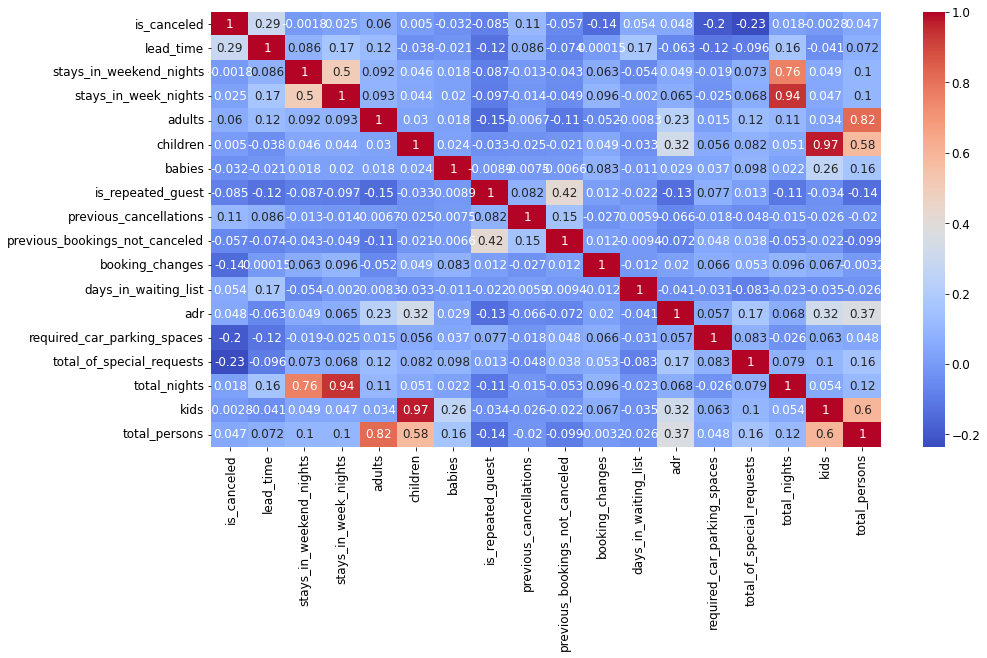

In [ ]:
num_features = ['is_canceled','lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','is_repeated_guest','previous_cancellations',
                'previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_nights','kids','total_persons']

plt.figure(figsize=(15,8))
mpl.rcParams['font.size'] = 12
correlation = hotel_df[num_features].corr()
sns.heatmap((correlation), annot=True, cmap='coolwarm')

#### From correlation heatmap we see:
* #### ‘is_canceled’ is positively correlated with ‘lead_time’, which we saw on the previous slide.
* #### Stays in week & weekend nights are highly & positively correlated to total nights, but weeknights is higher, indicating stays during weeknights are more.
* #### ‘adults’ is more positively correlated with ‘total_persons’ than ‘kids’ indicating majority of the customers are adults.
* #### ‘adr’ is positively correlated with ‘total_persons’, indicating hotels can earn more if persons per booking are more.
* #### ‘kids’ is highly & positively correlated with ‘children’ than ‘babies, indicating that families with infants travel less as compared to families with grown kids.
